In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 16s 536ms/step - accuracy: 0.2109 - loss: 2.2239
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 1: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1880 - loss: 2.0655 - val_accuracy: 0.3117 - val_loss: 1.8509
Epoch 2/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2656 - loss: 1.9314
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 2: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2770 - loss: 1.8553 - val_accuracy: 0.3449 - val_loss: 1.7213
Epoch 3/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2578 - loss: 1.8125
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 3: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━

In [56]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9520 - loss: 0.2650


In [57]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [58]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[2.6418161e-02 9.3145013e-01 4.1965671e-02 1.5911935e-05 5.4490588e-06
 1.4467031e-04 7.1189619e-09]
1


# Confusion matrix

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


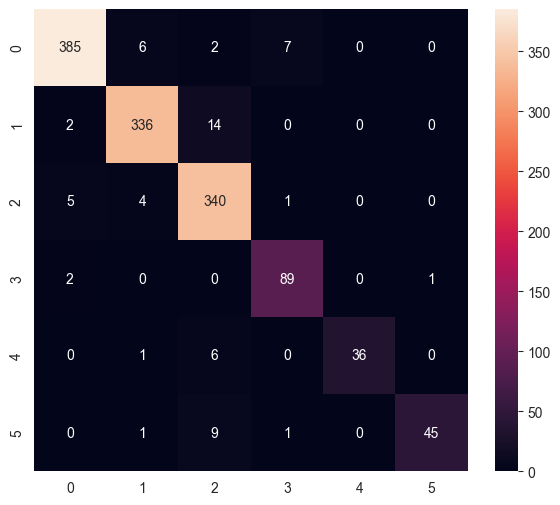

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       400
           1       0.97      0.95      0.96       352
           2       0.92      0.97      0.94       350
           3       0.91      0.97      0.94        92
           4       1.00      0.84      0.91        43
           5       0.98      0.80      0.88        56

    accuracy                           0.95      1293
   macro avg       0.96      0.92      0.93      1293
weighted avg       0.95      0.95      0.95      1293



In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [60]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [61]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/pk/fyfy085x7ln911ldxhvzd84h0000gn/T/tmpq40hc8ck/assets


INFO:tensorflow:Assets written to: /var/folders/pk/fyfy085x7ln911ldxhvzd84h0000gn/T/tmpq40hc8ck/assets


Saved artifact at '/var/folders/pk/fyfy085x7ln911ldxhvzd84h0000gn/T/tmpq40hc8ck'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  5435766928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5435759440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5435762704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5435758864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5435759632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5435752912: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1769158821.888857  159932 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1769158821.888881  159932 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2026-01-23 14:30:21.889184: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/pk/fyfy085x7ln911ldxhvzd84h0000gn/T/tmpq40hc8ck
2026-01-23 14:30:21.889459: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2026-01-23 14:30:21.889463: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/pk/fyfy085x7ln911ldxhvzd84h0000gn/T/tmpq40hc8ck
2026-01-23 14:30:21.891507: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2026-01-23 14:30:21.903732: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/pk/fyfy085x7ln911ldxhvzd84h0000gn/T/tmpq40hc8ck
2026-01-23 14:30:21.907141: I tensorflow/cc/saved_model/loader.cc:

6724

# Inference test

In [62]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [63]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [64]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [65]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 26 μs, sys: 8 μs, total: 34 μs
Wall time: 36.2 μs


In [66]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.6418155e-02 9.3145019e-01 4.1965645e-02 1.5911906e-05 5.4490383e-06
 1.4467005e-04 7.1189357e-09]
1
